In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import nltk
import sklearn as sk
import re
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
en_df_raw = pd.read_csv('data/CONcreTEXT_trial_EN.tsv', sep='\t') # load data files
it_df_raw = pd.read_csv('data/CONcreTEXT_trial_IT.tsv', sep='\t')

en_df = pd.DataFrame()
it_df = pd.DataFrame()

en_df_raw.head()

,TARGET,POS,INDEX,TEXT,MEAN
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06
1,achievement,N,9,"Please list people you have helped , your pers...",3.03
2,activate,V,1,Add activated carbon straight to your vodka .,3.83
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51
4,adventure,N,9,Look for a partner that shares your level of a...,2.03


## Question 1

In [3]:
en_df_raw['TEXT'][50] # understanding the dataset, so lets print out a sample sentence with at least one apostrophe, comma, and period

'Read the company ’s mission statement , history , and any other information you can find about them . '

In [4]:
# data cleaning
en_df['SENTENCES'] = en_df_raw['TEXT'].apply(lambda sent: sent.strip().lower())
it_df['SENTENCES'] = it_df_raw['TEXT'].apply(lambda sent: sent.strip().lower())

In [5]:
en_df['SENTENCES'][50] # same sample sentence but stripped and lowercase

'read the company ’s mission statement , history , and any other information you can find about them .'

In [6]:
# lets stem words that have an apostrophe followed by s or ll or any other '\w+ pattern

# REGEX (\w+)?['’]\w+
# optional capture group for \w+ to capture any characters before a '
# matches either ' or ’ (because this corpus for some reason uses both :) )
# matches characters after it

# lets get rid of non alphanumeric characters
# lets also tokenize using wordpunct_tokenize

stemmed = en_df['SENTENCES'].apply(lambda sent: re.sub(r"(\w+)?['’]\w+", '', sent)) # getting rid of apostrophe things
only_words = stemmed.apply(lambda sentence: re.sub(r"[^a-zA-Z0-9 ]+", '', sentence)) # getting rid of punctuation, in other words, all non-alphaneumeric characters
en_df['TOKENS'] = only_words.apply(nltk.wordpunct_tokenize) # tokenize :)

In [7]:
en_df['TOKENS'][50] # let's check on our sample sentence

['read',
 'the',
 'company',
 'mission',
 'statement',
 'history',
 'and',
 'any',
 'other',
 'information',
 'you',
 'can',
 'find',
 'about',
 'them']

In [8]:
# make a word2vec!
model = Word2Vec(list(en_df['TOKENS']), window=5, size=500, workers=4, min_count=5)
model.wv.vocab

{'and': <gensim.models.keyedvectors.Vocab at 0x7fbe66774310>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fbe63ad0250>,
 'your': <gensim.models.keyedvectors.Vocab at 0x7fbe63affe80>,
 'life': <gensim.models.keyedvectors.Vocab at 0x7fbe63b240d0>,
 'you': <gensim.models.keyedvectors.Vocab at 0x7fbe63b24100>,
 'have': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b400>,
 'or': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b130>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b220>,
 'when': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b2b0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b880>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b8e0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b940>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fbe6947b9a0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fbe6947ba00>,
 'if': <gensim.models.keyedvectors.Vocab at 0x7fbe6947ba60>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7fbe6947bac0>,
 'they': <g

In [9]:
tokens = []
labels = []

for label in model.wv.vocab:
    labels.append(label)
    tokens.append(model.wv[label])

In [10]:
tokens[0][:10] # show some weightings for label 'and', which is label 0

array([-2.8704284e-04, -9.1386144e-04, -8.5199683e-04,  9.0527159e-05,
       -5.9238099e-04, -8.4691431e-04, -6.9214159e-04, -3.8059635e-04,
        1.8358204e-04, -6.9234968e-04], dtype=float32)

In [11]:
tsne_model = TSNE(perplexity=250, n_components=2, init='pca', n_iter=250)

In [12]:
vals = tsne_model.fit_transform(tokens)

In [13]:
x = []
y = []
for v in vals:
    x.append(v[0])
    y.append(v[1])

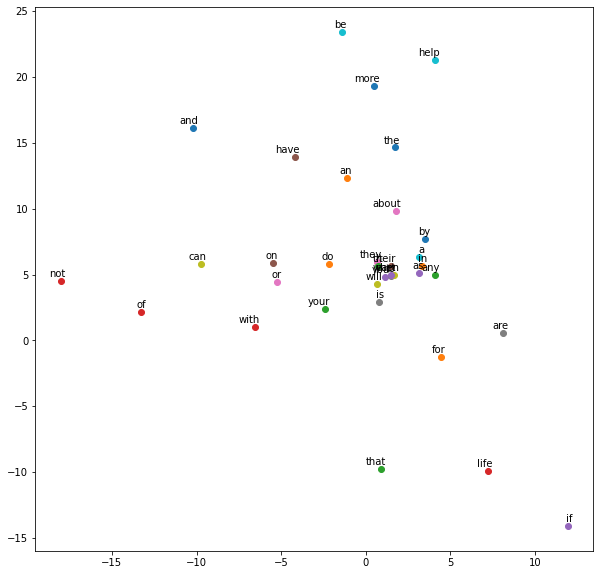

In [14]:
matplot.pyplot.figure(figsize=(10, 10)) 
for i in range(len(x)):
  matplot.pyplot.scatter(x[i],y[i])
  matplot.pyplot.annotate(labels[i],
  xy=(x[i], y[i]),
  xytext=(5, 2),
  textcoords='offset points',
  ha='right',
  va='bottom')

## Question 2
*PROMPT:
Are you satisfied with the quality of the embeddings? Why or why not? 
Give concrete examples of when the model is making correct judgments and when it is failing. Write at least 50 words.*

*You may find the methods such as model.wv.most_similar and self.wv.doesnt_match()
to be useful in determining how the model is behaving. For example, the most similar word to ‘caesar’ in our reference code is ‘brutus’ which may seem correct. You should find similar examples  of words in the English language data you have used to train the model on in Question 1 of this assignment.*


## Question 3 **

*PROMPT:
You have trained your own toy word embedding but there are two important tricks the homework didn't cover, which are Subsampling Frequent Words and Negative Sampling. Explain why we need these two tricks? Write at least 100 words.*